# Seaborn - Adding more functionality (and class) to plotting in Python

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

### Viz and exploratory data analysis books

* [Exploratory Data Analysis](http://www.amazon.com/Exploratory-Data-Analysis-John-Tukey/dp/0201076160) by John Tukey

Other Authors on EDA:

* William Cleveland
* Edward Tufte

In [3]:
# Let's do a histogram with defaults (matplotlib)

(array([ 5.,  6., 11., 17., 23., 13., 10., 10.,  1.,  4.]),
 array([-2.12367514, -1.65558843, -1.18750172, -0.71941501, -0.2513283 ,
         0.21675841,  0.68484512,  1.15293183,  1.62101854,  2.08910524,
         2.55719195]),
 <a list of 10 Patch objects>)

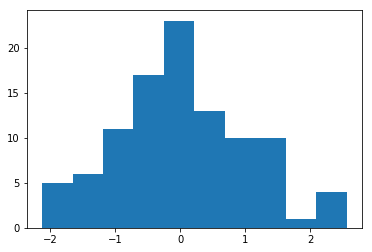

In [2]:
plt.hist(np.random.randn(100))

### Better Defaults

In [3]:
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("husl")

(array([ 6.,  6., 15., 18., 19., 13.,  9.,  7.,  4.,  3.]),
 array([-1.99623687, -1.56619162, -1.13614637, -0.70610113, -0.27605588,
         0.15398937,  0.58403462,  1.01407987,  1.44412512,  1.87417036,
         2.30421561]),
 <a list of 10 Patch objects>)

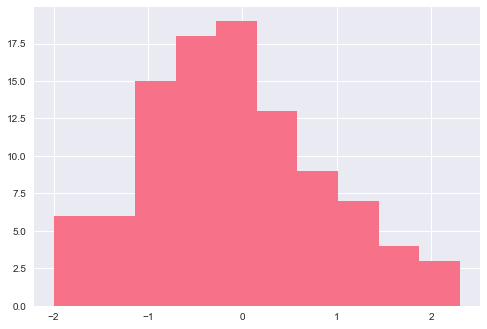

In [4]:
plt.hist(np.random.randn(100))

* What do you see different between the two plots?

## Seaborn

Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

Source: [Seaborn Docs](http://stanford.edu/~mwaskom/software/seaborn/)

Seaborn comes with some sample datasets that we will use to explore (https://github.com/mwaskom/seaborn-data)

In [5]:
titanic = sns.load_dataset("titanic")

In [6]:
# This is our familiar Pandas dataframe
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [7]:
# Remove all rows that have null Age
titanic = titanic[titanic.age.notnull()]

### Histogram (Distributions)

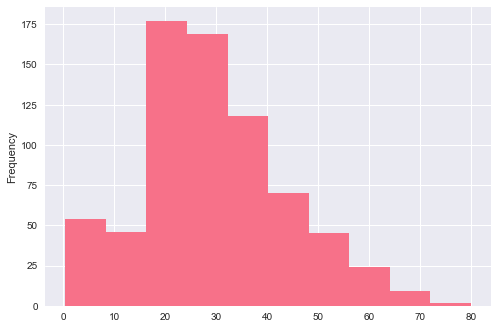

In [8]:
# We can plot distribution of Age by just using Pandas
# We don't need Seaborn for that
# Plot an histogram of age
titanic.age.plot.hist();

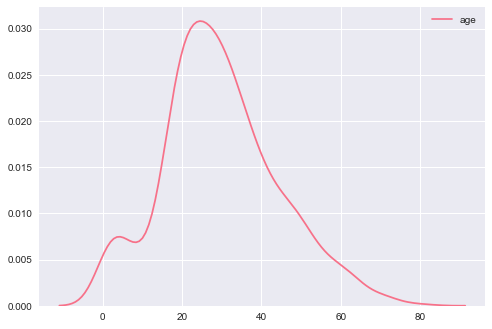

In [9]:
# But Seaborn adds some additional ways to look at distributions
sns.kdeplot(titanic.age)

/Users/larakattan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


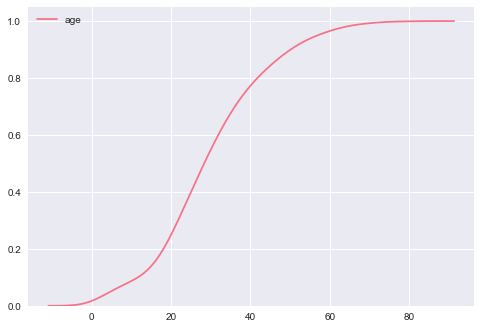

In [12]:
# Do a Cumulative Plot
sns.kdeplot(titanic.age, cumulative=True)

/Users/larakattan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


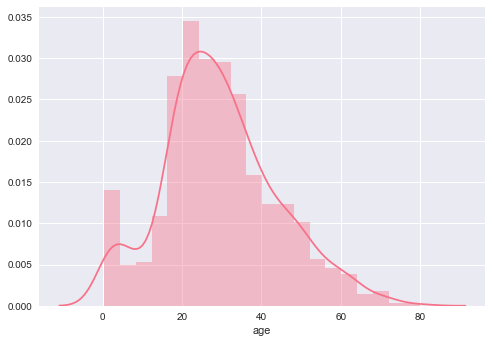

In [21]:
# Overlay Histogram and Dist Plot
sns.distplot(titanic.age);

### Box Plots

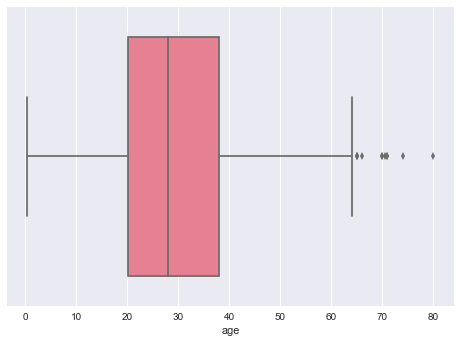

In [13]:
sns.boxplot(titanic.age);

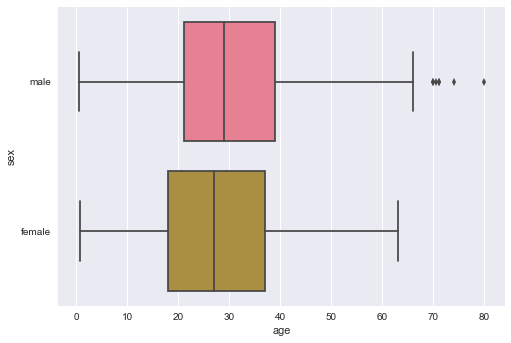

In [19]:
sns.boxplot(titanic.age, titanic.sex);

### Violin Plot

/Users/larakattan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


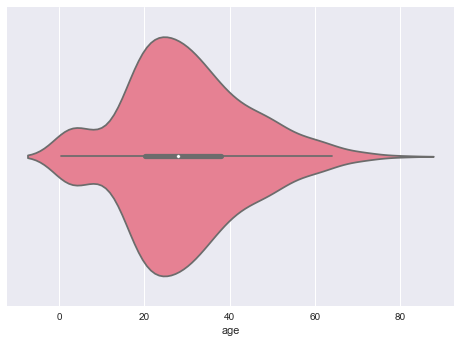

In [20]:
sns.violinplot(titanic.age);

/Users/larakattan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


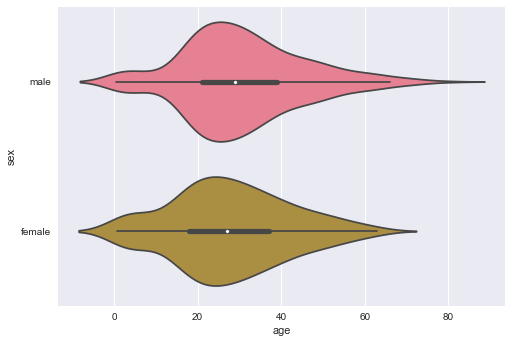

In [21]:
sns.violinplot(titanic.age, titanic.sex);

### Plot by Group

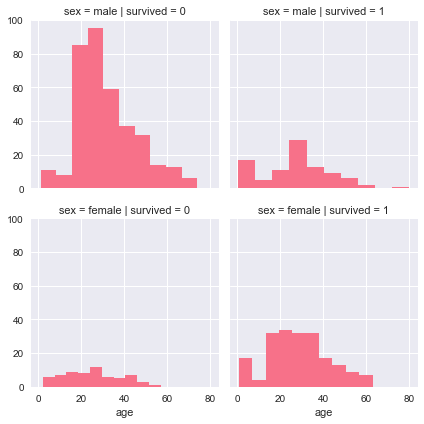

In [10]:
# Now look at survived data

g = sns.FacetGrid(titanic, row='sex', col='survived', sharex=True, sharey=True) # for conditional relationships
# links pandas df to matplotlib 

g.map(plt.hist, "age");

# The basic workflow is to initialize the FacetGrid object with the dataset and the variables 
# that are used to structure the grid. Then one or more plotting functions can be applied to 
# each subset by calling FacetGrid.map()

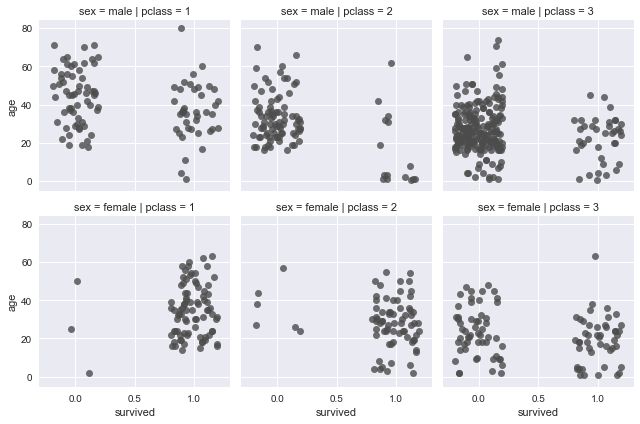

In [11]:
# Plot how many survived, by gender and class
grid_plot = sns.FacetGrid(titanic, row='sex', col='pclass')
grid_plot.map(sns.regplot, 'survived', 'age',color='.3', fit_reg=False, x_jitter=.2);

### Let's look at a IRIS Dataset

In [12]:
iris = sns.load_dataset("iris")

In [13]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Scatter Matrix

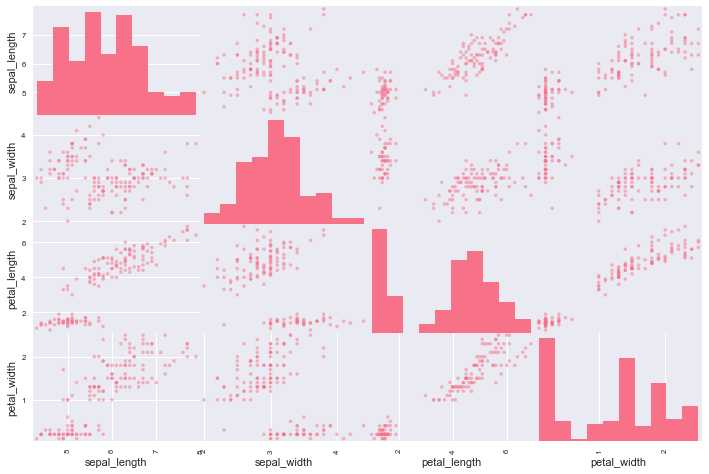

In [26]:
pd.plotting.scatter_matrix(iris, figsize=(12,8));

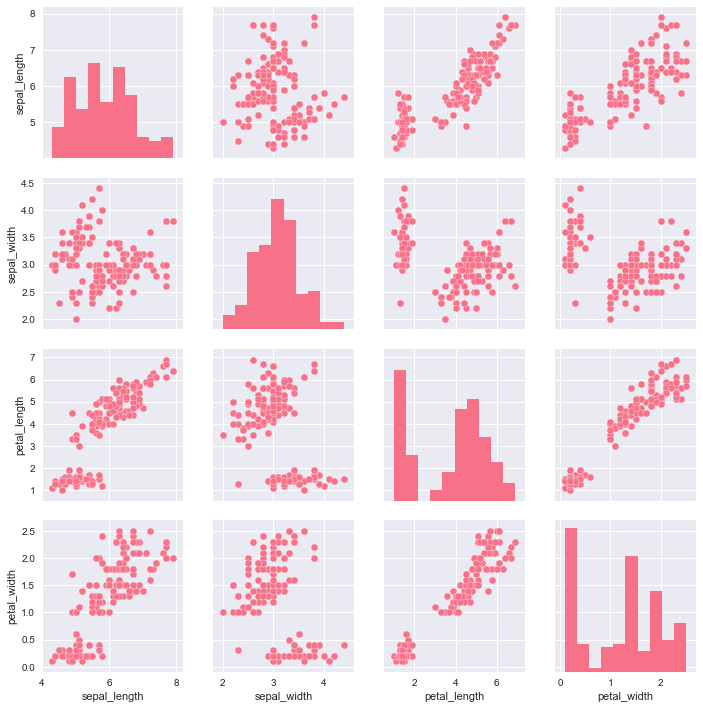

In [33]:
# Seaborn does this pair wise comparison better
sns.pairplot(iris);

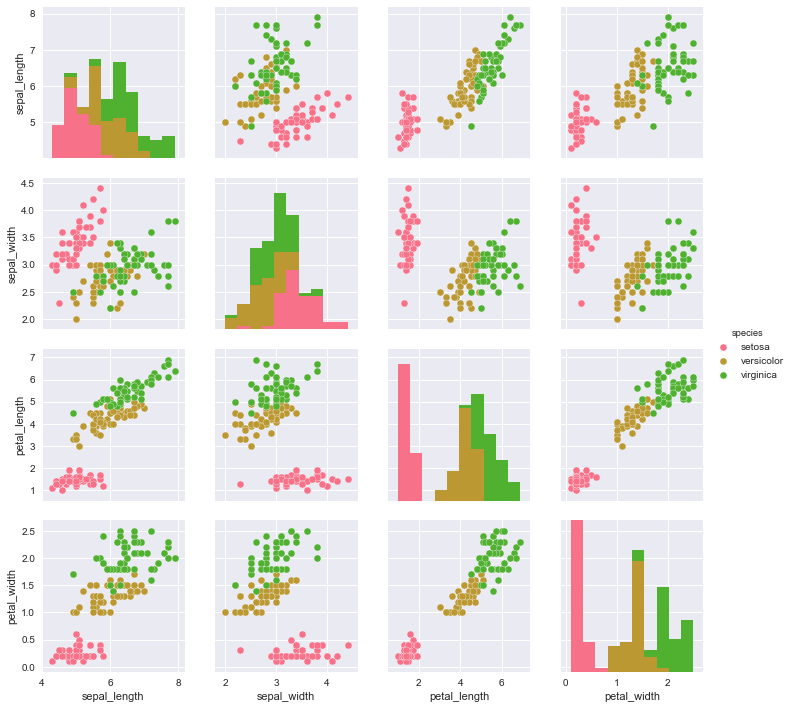

In [27]:
sns.pairplot(iris, hue="species");

### Joint Plot

* Multiple plots at once

/Users/larakattan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/larakattan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/larakattan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


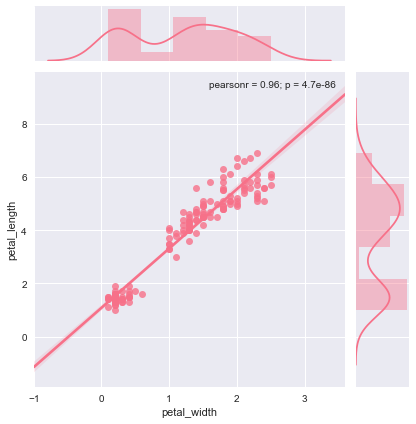

In [28]:
sns.jointplot("petal_width", "petal_length", kind="regplot", data=iris);